In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [68]:
image_path = "strawberry.jpg"  
image = cv2.imread(image_path)
img2 = cv2.imread("strawberry_raw.jpg")

In [51]:
# Mengonversi gambar ke ruang warna CIELAB
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Memecah saluran L, A, B
l_channel, a_channel, b_channel = cv2.split(lab_image)

In [52]:
def calculate_histogram(channel):
    histogram = np.zeros(256, dtype=int)  # Inisialisasi array untuk histogram
    for value in channel.ravel():  # Iterasi semua nilai piksel dalam saluran
        histogram[value] += 1
    return histogram

In [53]:
# Hitung histogram untuk setiap saluran
l_hist = calculate_histogram(l_channel)
a_hist = calculate_histogram(a_channel)
b_hist = calculate_histogram(b_channel)

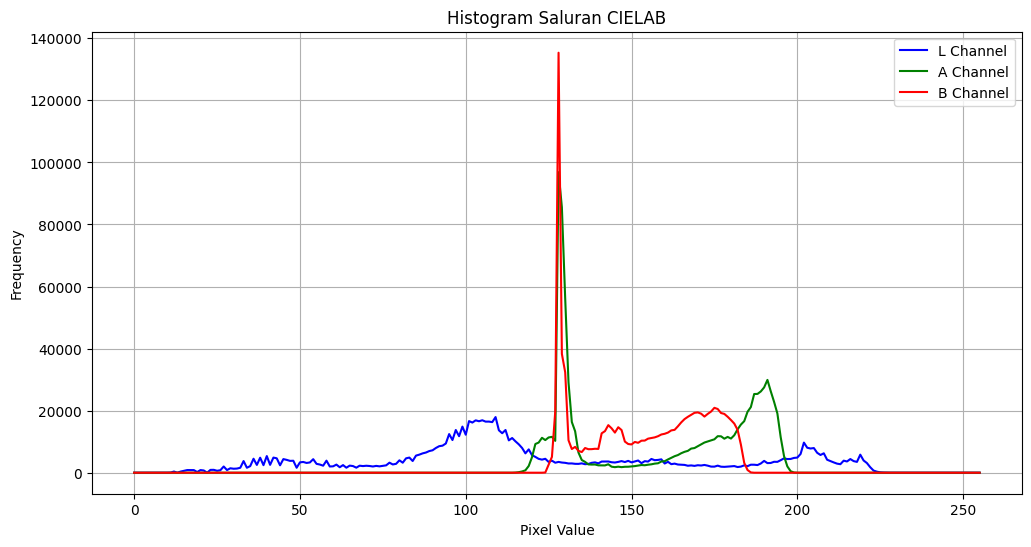

In [54]:
# Plot histogram
plt.figure(figsize=(12, 6))
plt.plot(l_hist, label="L Channel", color="blue")
plt.plot(a_hist, label="A Channel", color="green")
plt.plot(b_hist, label="B Channel", color="red")
plt.title("Histogram Saluran CIELAB")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

In [55]:
def plot_histogram(image, title, channel_labels):
    plt.figure(figsize=(12, 6))
    for i, label in enumerate(channel_labels):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, label=f"{label} Channel")
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()
    plt.show()

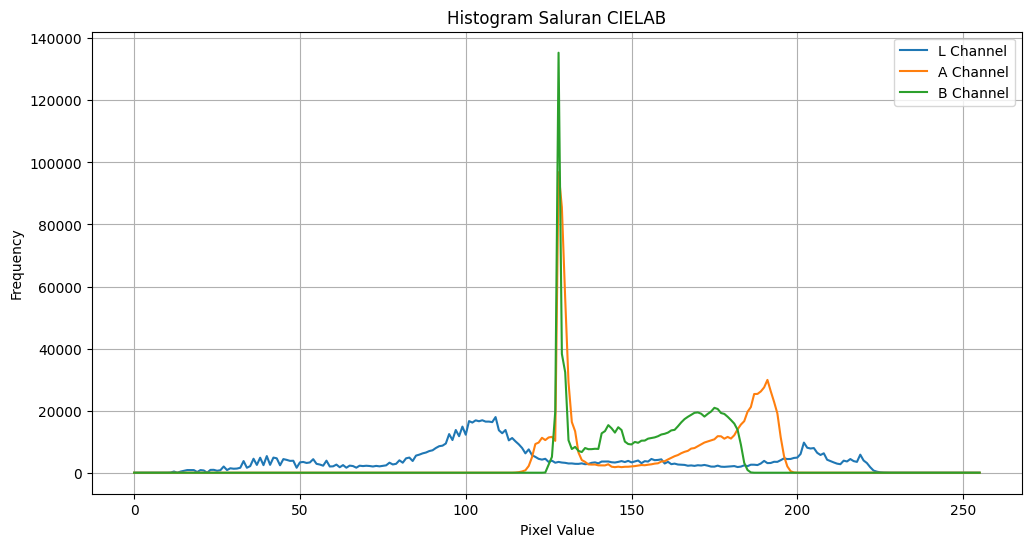

In [56]:
plot_histogram(lab_image, "Histogram Saluran CIELAB", ["L", "A", "B"])

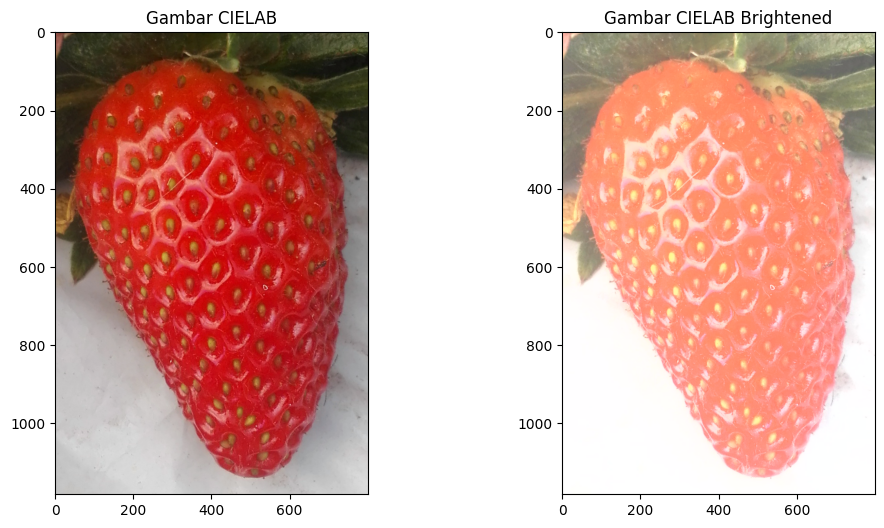

In [82]:
l_channel_brightened = cv2.add(l_channel, 100)
lab_image_brightened = cv2.merge((l_channel_brightened, a_channel, b_channel))

rgb_img = cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)
rgb_img_brightened = cv2.cvtColor(lab_image_brightened, cv2.COLOR_LAB2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title("Gambar CIELAB")

plt.subplot(1, 2, 2)
plt.imshow(rgb_img_brightened)
plt.title("Gambar CIELAB Brightened")

plt.show()


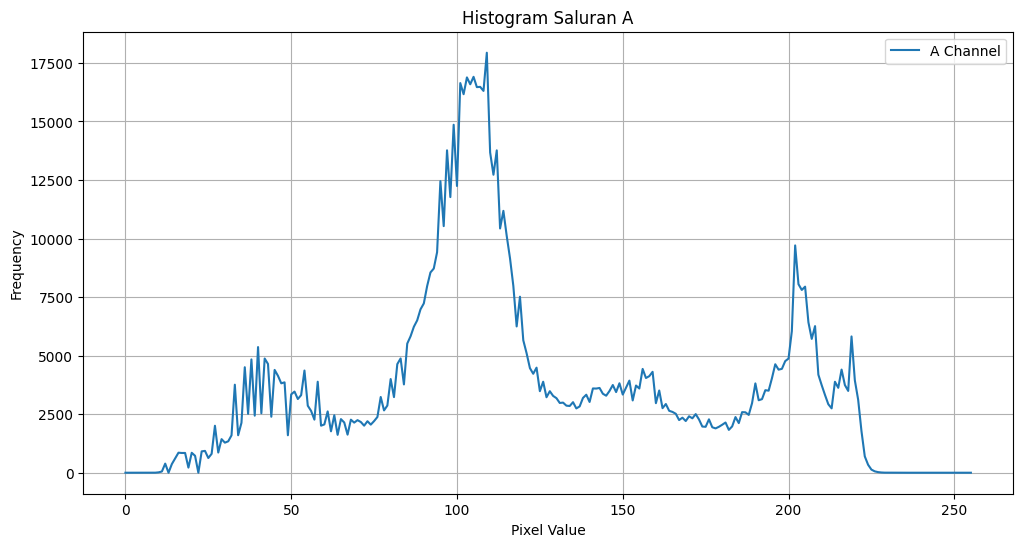

In [66]:
plot_histogram(lab_image, "Histogram Saluran A", ["A"])

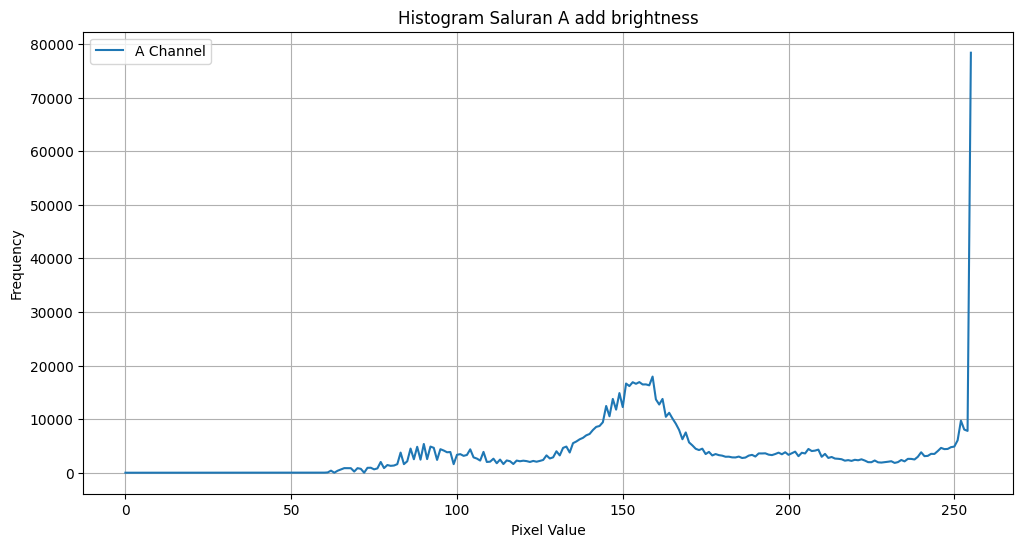

In [63]:
plot_histogram(lab_image_brightened, "Histogram Saluran A add brightness", ["A"])

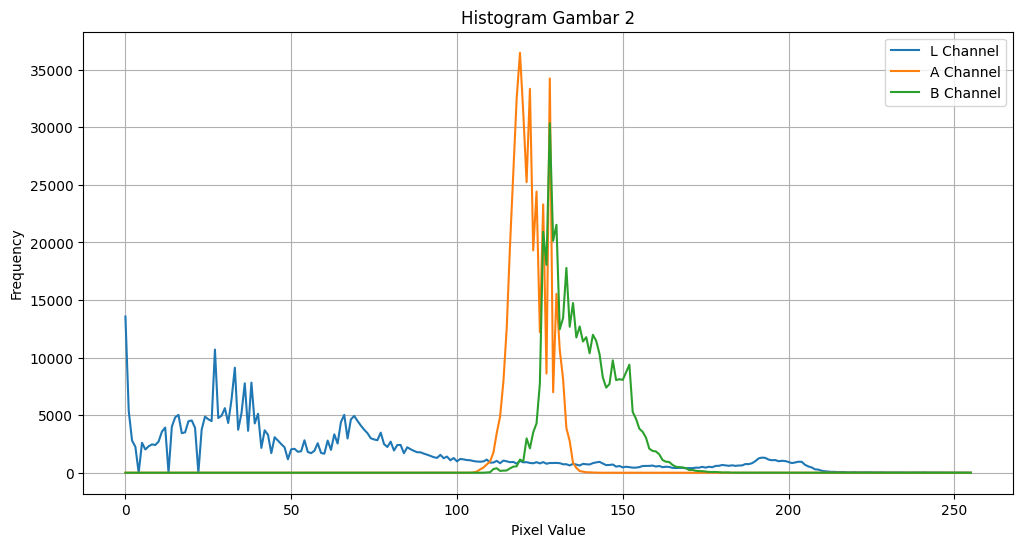

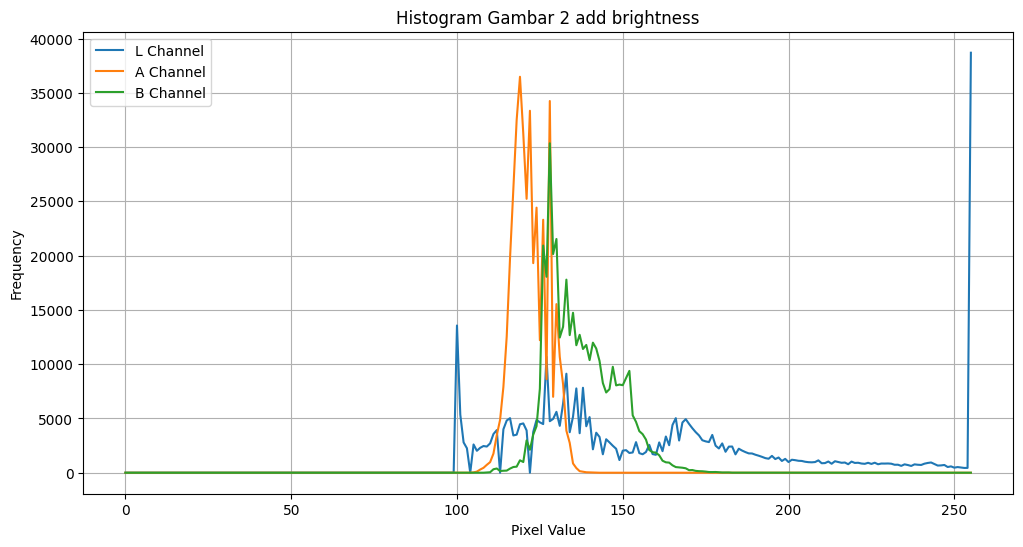

In [84]:
lab_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2LAB)

l,a,b = cv2.split(lab_img2)
l_bright = cv2.add(l, 100)
new_lab = cv2.merge((l_bright, a, b))

plot_histogram(lab_img2, "Histogram Gambar 2", ["L", "A", "B"])
plot_histogram(new_lab, "Histogram Gambar 2 add brightness", ["L", "A", "B"])


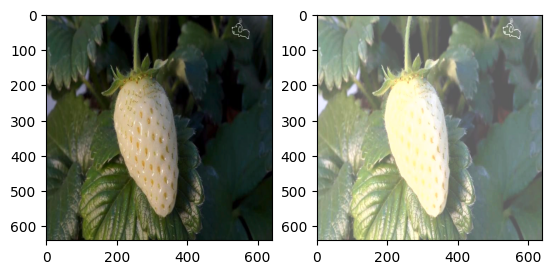

In [86]:
rgb_img2 = cv2.cvtColor(lab_img2, cv2.COLOR_LAB2RGB)
rgb_img2_bright = cv2.cvtColor(new_lab, cv2.COLOR_LAB2RGB)

plt.subplot(1, 2, 1)
plt.imshow(rgb_img2)

plt.subplot(1, 2, 2)
plt.imshow(rgb_img2_bright)